第19天的教育訓練課程將專注於即時物件檢測，以下是課程的概述與步驟，讓你能使用攝影機實現即時物件檢測，並將結果展示在專案中。

### 課程主題：即時物件檢測

#### 目標：
1. 使用 YOLOv5 實現即時物件檢測。
2. 使用本地攝影機擷取影像並將其傳入 YOLOv5 模型中進行推論。
3. 顯示即時的物件檢測結果，包括預測框、類別和置信度。

### 步驟 1：確保依賴項安裝完整
首先，確保你已經安裝了必要的依賴項，例如 OpenCV 來處理即時視頻流，和 YOLOv5 來進行物件檢測。

如果還沒有安裝 OpenCV，請使用以下命令來安裝：
```bash
pip install opencv-python
```

### 步驟 2：即時物件檢測程式碼
以下是 Python 程式碼，用來使用 YOLOv5 模型進行即時物件檢測。這段程式碼會啟動你的本地攝影機，並對即時視頻進行物件檢測，將結果以視覺化方式顯示出來。

```python
import cv2
import torch

# 載入 YOLOv5 模型
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5s.pt')

# 開啟攝影機（默認為本地攝影機0）
cap = cv2.VideoCapture(0)

# 檢查攝影機是否開啟成功
if not cap.isOpened():
    print("無法開啟攝影機")
    exit()

while True:
    # 讀取每一幀
    ret, frame = cap.read()
    
    # 檢查是否成功讀取
    if not ret:
        print("無法獲取視頻流")
        break
    
    # YOLOv5 進行推論
    results = model(frame)
    
    # 獲取 YOLOv5 推論後的框與標註資訊
    result_frame = results.render()  # 將預測結果畫在圖片上
    
    # 顯示結果
    cv2.imshow('YOLOv5 Realtime Object Detection', result_frame[0])
    
    # 按下 'q' 鍵退出循環
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 釋放攝影機資源
cap.release()
cv2.destroyAllWindows()
```

### 步驟 3：運行程式
在終端或 VSCode 中運行這段程式碼，應該會開啟你的攝影機，並開始實時物件檢測。如果你使用的模型不同（例如自定義數據集訓練的模型），請更改 `path='yolov5s.pt'` 為你自己的權重文件路徑。

### 步驟 4：將結果展示於專案中
1. **展示畫面**：程式會自動打開一個 OpenCV 視窗來顯示結果，預測框與物件類別會顯示在畫面上。
2. **記錄結果**：你可以選擇將檢測結果保存成視頻或圖片來作為報告的一部分展示：
   
   ```python
   out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'XVID'), 20.0, (640,480))
   
   # 在每個循環中加入這行將幀寫入文件
   out.write(result_frame[0])
   ```

### 進階調整：
1. **模型微調**：可以使用之前的超參數微調課程來提升即時檢測的準確度和性能。
2. **硬體加速**：如果有支援 GPU 的環境，可以使用 CUDA 加速來提升即時檢測的速度。

這樣的即時物件檢測程式可以作為你的 YOLOv5 專案中的一部分，展示在面試或報告中時可以即時演示效果。

### 影片

In [ ]:
import cv2
import torch

# 使用自定義訓練的 YOLOv5 模型，並指定你的權重文件路徑
model_path = r'D:\Learning_Python\30-Day_AI_Deep_Learning_Plan\yolov5-master\runs\train\exp2\weights\best.pt'
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path)

# 開啟攝影機（默認為本地攝影機0）
cap = cv2.VideoCapture(0)

# 檢查攝影機是否開啟成功
if not cap.isOpened():
    print("無法開啟攝影機")
    exit()

while True:
    # 讀取每一幀
    ret, frame = cap.read()
    
    # 檢查是否成功讀取
    if not ret:
        print("無法獲取視頻流")
        break
    
    # YOLOv5 進行推論
    results = model(frame)
    
    # 獲取 YOLOv5 推論後的框與標註資訊
    result_frame = results.render()  # 將預測結果畫在圖片上
    
    # 顯示結果
    cv2.imshow('YOLOv5 Realtime Object Detection', result_frame[0])
    
    # 按下 'q' 鍵退出循環
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 釋放攝影機資源
cap.release()
cv2.destroyAllWindows()

### 圖片

detect: weights=['/app/exp2/weights/best.pt'], source=/app/Day17/images/val/202145.jpg, data=../../../../app/yolov5-master/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.023, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/app/yolov5-master/runs/detect, name=custom_exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2024-9-20 Python-3.11.6 torch-2.4.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /app/Day17/images/val/202145.jpg: 640x544 1 Female, 96.4ms
Speed: 1.3ms pre-process, 96.4ms inference, 0.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to /app/yolov5-master/runs/detect/custom_exp


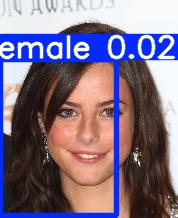

In [27]:
import os
from PIL import Image

# 設定 base_path 到你的專案根目錄
base_path = "/app"  # 這是你掛載到容器中的路徑

# 建構各部分的路徑
detect_script_path = os.path.join(base_path, "yolov5-master", "detect.py")
weights_path = os.path.join(base_path, "exp2", "weights", "best.pt")
source_path = os.path.join(base_path, "Day17", "images", "val", "202145.jpg")

# 使用IPython的system方法執行指令，並確保所有路徑都正確引用
# 確保每個 \\ 後面沒有空格!
cmd = f"""
python3 '{detect_script_path}' \\
--weights '{weights_path}' \\
--conf 0.023 \\
--source '{source_path}' \\
--device cpu \\
--project '/app/yolov5-master/runs/detect' \\
--name 'custom_exp'
"""

os.system(cmd)

# 檢測結果路徑，這裡假設 YOLOv5 會將結果圖片輸出到 detect 的 exp 資料夾下
detect_result_path = os.path.join(base_path, "yolov5-master", "runs", "detect", "custom_exp", "202145.jpg")

# 開啟並顯示檢測結果
img = Image.open(detect_result_path)
img.show()
